In [1]:
%reset
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
from opts import Lion

class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )
    
  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
  
if __name__ == '__main__':
  
  # Set fixed random number seed
  torch.manual_seed(42)
  
  # Prepare CIFAR-10 dataset
  dataset = CIFAR10(os.getcwd(), download=True, transform=transforms.ToTensor())
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)
  
  # Initialize the MLP
  mlp = MLP()
  
  # Define the loss function and optimizer
  loss_function = nn.CrossEntropyLoss()
  # Adam
  # optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)
  optimizer = Lion(mlp.parameters(), lr=3e-5, weight_decay=1.)
  # Run the training loop
  losses = []
  for epoch in range(0, 50): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get inputs
      inputs, targets = data
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      dicts = optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          losses.append(current_loss/500)
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

Nothing done.


100%|██████████| 170498071/170498071 [00:09<00:00, 17442281.13it/s]


Extracting /mnt/bn/lzchen-us/workspace/adamw/cifar-10-python.tar.gz to /mnt/bn/lzchen-us/workspace/adamw
Starting epoch 1
Loss after mini-batch   500: 2.242
Loss after mini-batch  1000: 2.106
Loss after mini-batch  1500: 2.027
Loss after mini-batch  2000: 1.988
Loss after mini-batch  2500: 1.933
Loss after mini-batch  3000: 1.935
Loss after mini-batch  3500: 1.899
Loss after mini-batch  4000: 1.890
Loss after mini-batch  4500: 1.861
Loss after mini-batch  5000: 1.846
Starting epoch 2
Loss after mini-batch   500: 1.819
Loss after mini-batch  1000: 1.824
Loss after mini-batch  1500: 1.819
Loss after mini-batch  2000: 1.814
Loss after mini-batch  2500: 1.805
Loss after mini-batch  3000: 1.808
Loss after mini-batch  3500: 1.797
Loss after mini-batch  4000: 1.767
Loss after mini-batch  4500: 1.772
Loss after mini-batch  5000: 1.768
Starting epoch 3
Loss after mini-batch   500: 1.745
Loss after mini-batch  1000: 1.761
Loss after mini-batch  1500: 1.755
Loss after mini-batch  2000: 1.754
Loss

In [47]:

for i in range(5):
    print(dicts["p"][i].shape)
# print(dicts["p"][1])
# print(dicts["grad"][1])
# torch.stack((dicts["p"][1], dicts["grad"][1]))


torch.Size([196608])
torch.Size([64])
torch.Size([2048])
torch.Size([32])
torch.Size([320])


In [1]:
# Assuming dicts["p"][1] and dicts["grad"][1] are tensors
# We will print pairs (dicts["p"][1][i], dicts["grad"][1][i]) for each index i
import torch
p_tensor = dicts["p"][1]
grad_tensor = dicts["grad"][1]

# Check that both tensors have the same length
if p_tensor.size(0) != grad_tensor.size(0):
    print("Error: Parameter and Gradient tensors do not match in size.")
else:
    # Iterate over each index i and print the paired values
    for i in range(p_tensor.size(0)):
        print(f"({p_tensor[i].item()}, {grad_tensor[i].item()})")


NameError: name 'dicts' is not defined

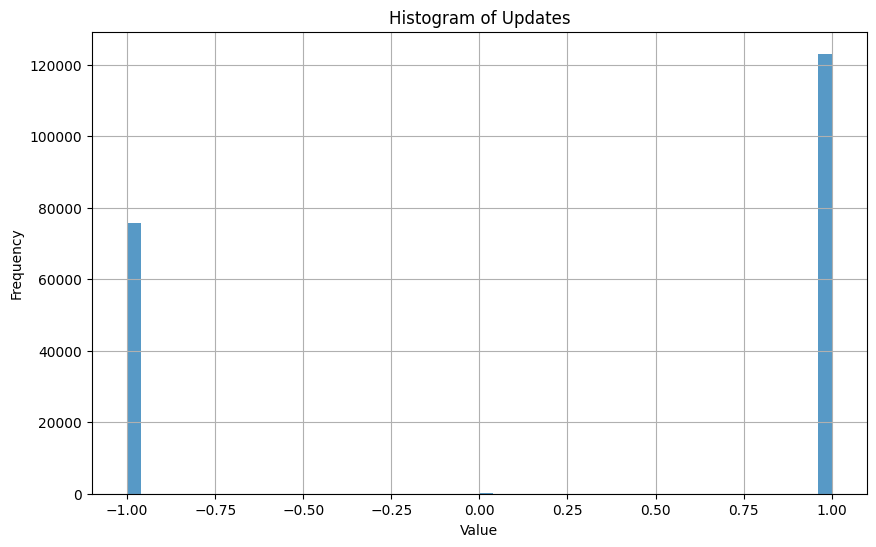

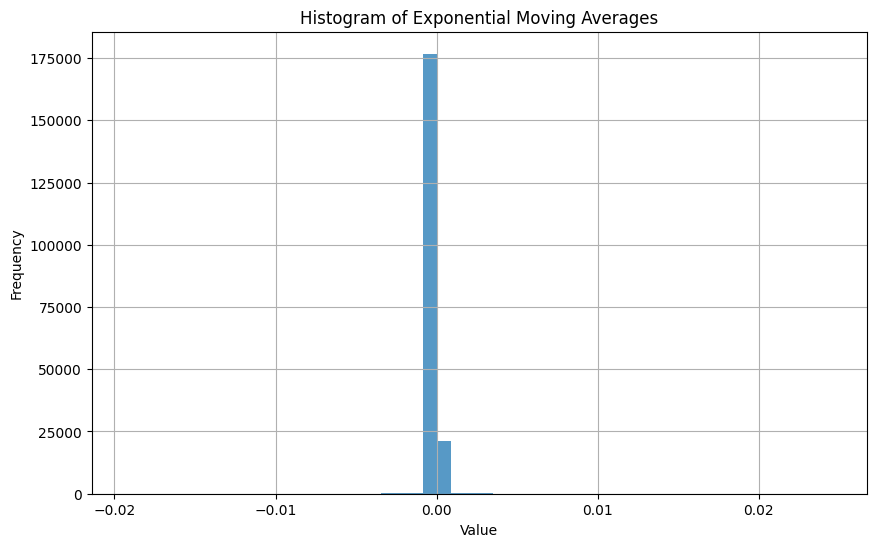

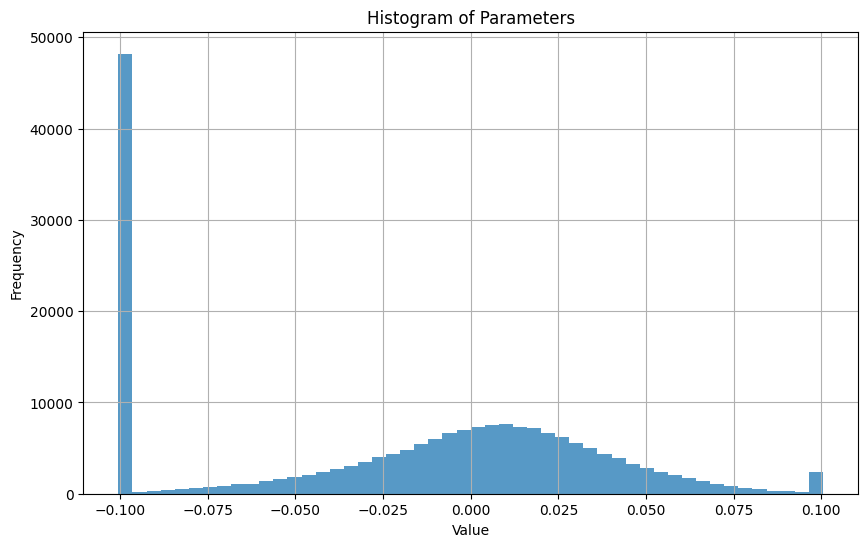

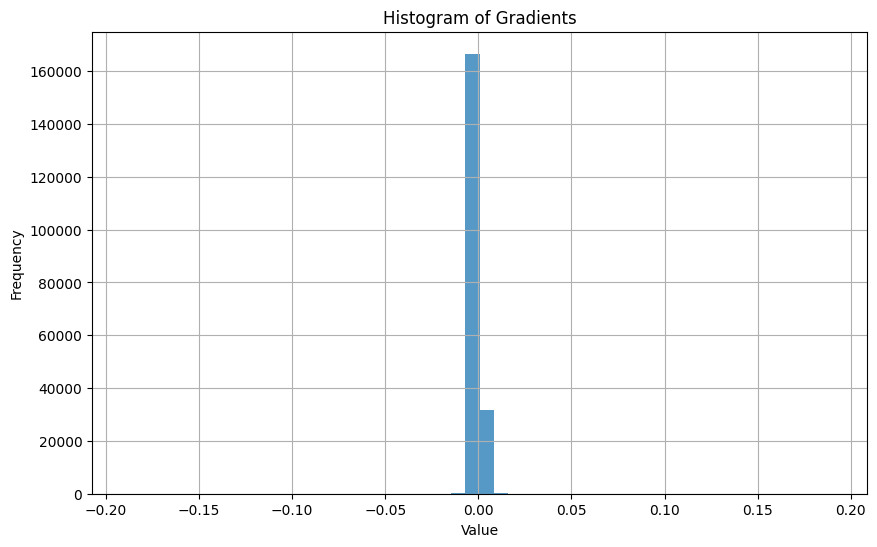

In [6]:
import matplotlib.pyplot as plt

# Function to concatenate and flatten tensors in a list
def tensors_to_vector(tensor_list):
    if tensor_list:
        # Concatenate tensors along dimension 0 and then flatten the result to make it 1D
        return torch.cat(tensor_list).flatten()
    else:
        return torch.tensor([])  # Return an empty tensor if list is empty

# Assuming 'dicts' is the dictionary containing lists of tensors
dicts =  torch.load("./results/dicts_2024-05-29_08-45-22.pth")
updates_vector = tensors_to_vector(dicts['update'])
exp_avg_vector = tensors_to_vector(dicts['exp_avg'])
params_vector = tensors_to_vector(dicts['p'])
grads_vector = tensors_to_vector(dicts['grad'])

# Function to plot a histogram
def plot_histogram(data, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data.numpy(), bins=50, alpha=0.75)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms for each vector
plot_histogram(updates_vector, "Histogram of Updates")
plot_histogram(exp_avg_vector, "Histogram of Exponential Moving Averages")
plot_histogram(params_vector.detach(), "Histogram of Parameters")
plot_histogram(grads_vector, "Histogram of Gradients")


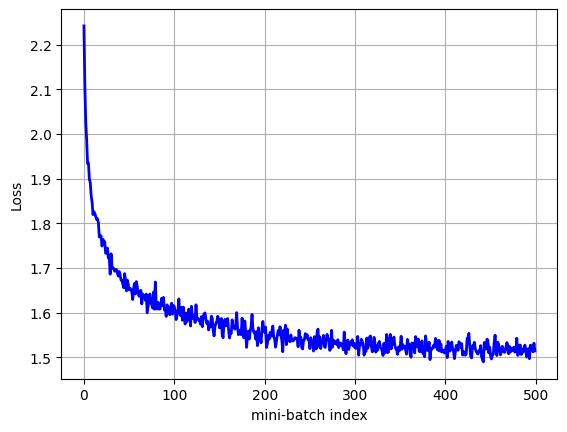

In [25]:
# Plot loss curve
import matplotlib.pyplot as plt
plt.plot(losses, label='Loss', color='blue', linewidth=2)
plt.ylabel('Loss')
plt.xlabel('mini-batch index')
plt.grid()
plt.show()

(-0.03135720267891884, 4.5071463922186084e-11)
(-0.02850060537457466, 0.0021403974387794733)
(0.004068860784173012, 0.0018222361104562879)
(0.08636999875307083, -0.0010647816816344857)
(0.00598855409771204, 7.668259083271067e-11)
(-0.1161760687828064, 0.0009628006373532116)
(-0.02165108732879162, -1.1482024098868893e-12)
(0.07734568417072296, -0.0015023091109469533)
(0.007181807421147823, 0.00041893223533406854)
(0.03148047998547554, 3.6525981891855075e-12)
(-0.014100424014031887, -0.00011864338011946529)
(0.03427014499902725, -0.0008106003515422344)
(0.09059218317270279, 0.0029223531018942595)
(-0.06111272796988487, 1.7363139704684727e-05)
(0.06908797472715378, 0.0009027176420204341)
(-0.03698476776480675, 0.001029251841828227)
(0.04739414155483246, -0.0009293286711908877)
(-0.01048608124256134, 0.00034360456629656255)
(0.10727028548717499, -0.0034093663562089205)
(0.08521855622529984, -0.002413088921457529)
(0.08116697520017624, 3.1273603151582563e-10)
(-0.11249304562807083, 0.002731

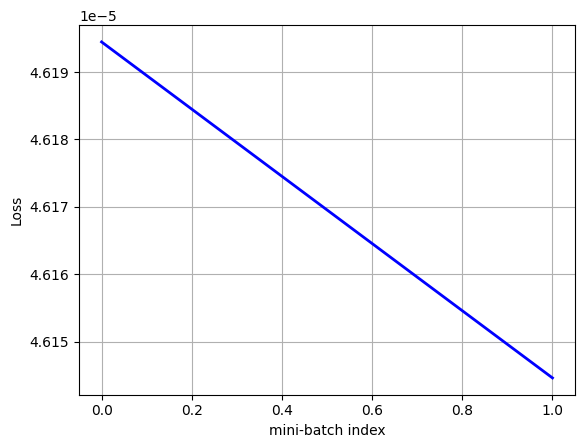

In [15]:
import torch
import matplotlib.pyplot as plt
dd = torch.load("./results/dicts_2024-05-30_06-55-04.pth")

p_tensor = dd["p"][2]
# grad_tensor = dd["exp_avg"][2]

# Check that both tensors have the same length
if p_tensor.size(0) != grad_tensor.size(0):
    print("Error: Parameter and Gradient tensors do not match in size.")
else:
    # Iterate over each index i and print the paired values
    for i in range(p_tensor.size(0)):
        print(f"({p_tensor[i].item()}, {grad_tensor[i].item()})")


ll = torch.load("./results/losses_2024-05-30_06-55-04.pth")
plt.plot(ll, label='Loss', color='blue', linewidth=2)
plt.ylabel('Loss')
plt.xlabel('mini-batch index')
plt.grid()
plt.show()

In [16]:
86017 -92159 -1 

-6143